In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import scipy.stats
import numpy as np

In [13]:
in_dir = "/Users/reder/Downloads/2023-05-26_CDF_test/Caffeine_Pos_20V/Caffeine_20V_Positive_matching"
pvals = []
for fname in tqdm(os.listdir(in_dir)):
    if not fname.endswith('.xlsx') or fname.startswith("~$"):
        continue
    fname_abs = os.path.join(in_dir, fname)
    pval_D2_intersection = pd.read_excel(fname_abs).iloc[6]['Intersection']
    pvals.append(pval_D2_intersection)

100%|██████████| 1352/1352 [00:02<00:00, 630.98it/s]


(0.0, 1.0)

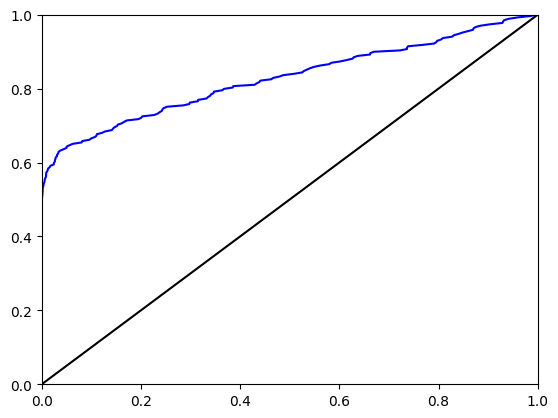

In [19]:
# data = dfOut[f'p-val ({pvalType})']
data = pvals
# scipy.stats.kstest(th, th)
res = scipy.stats.kstest(data, 'uniform')
kspval, ksstat = res.pvalue, res.statistic
x = np.sort(data)
y = 1. * np.arange(len(data)) / (len(data) - 1)
x_ones = np.linspace(0, 1, 6)
th = scipy.stats.uniform().cdf(x_ones)
# th = np.arange(0, 1.01, 0.01)
fig, ax = plt.subplots()
plt.plot(x,y, color = "blue")
plt.plot(x_ones, th, color = "black")
# title = f"{pref.replace('_', ' ')} {pvalType}"
# plt.title(title)
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
# pltText = f"N: {len(dfOut)}\nK-S statistic:{ksstat:.3f}\nK-S test p-value: {kspval:.2E}"
# plt.figtext(0.92, 0.5, pltText, fontsize=14, ha = 'left', fontfamily = 'DejaVu Sans')

# # plotFile = os.path.basename(args.inFile).replace('.pkl', f'_{pvalType.replace("^", "")}.pdf')
# plotFile = os.path.join(cmd_args_dict['outDir'], f"{pref}_{pvalType.replace('^', '')}.pdf")
# plt.savefig(plotFile, bbox_inches = 'tight')
# plt.close()

In [20]:
df_new = pd.read_csv("/Users/reder/Downloads/2023-05-26_CDF_test/Caffeine_Pos_20V/Caffeine_20V_Positive.tsv", sep = '\t')
df_old = pd.read_csv("/Users/reder/Downloads/2023-05-26_CDF_test/Caffeine_Pos_20V/Caffeine_Pos_20V.tsv", sep = '\t')

In [21]:
df_new.head()

,pair_index,mzML File 1,File 1 spectrum index (A),File 2 spectrum index (B),File 2 spectrum index (B).1,M,S_A,S_B,D^2,p-val (D^2),G^2,p-val (G^2),Unnamed: 12,# of spectrum pairs compared,K-S test D^2 p-val,K-S test G^2 p-val
0,0,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1032,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1040,19.0,5945.643208,1046.110430,82.913041,2.636983e-10,62.757989,7.277394e-07,NaN,270.0,3.038696e-92,4.537266e-79
1,1,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1036,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1037,31.0,8757.115621,7113.753710,23.473004,7.953260e-01,23.684526,7.861063e-01,NaN,NaN,NaN,NaN
2,2,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1039,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1042,16.0,2681.292452,558.401773,62.892301,7.972746e-08,49.844168,1.276784e-05,NaN,NaN,NaN,NaN
3,3,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1043,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1043,15.0,540.447754,547.003263,9.593501,7.912587e-01,9.792267,7.772080e-01,NaN,NaN,NaN,NaN
4,4,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1039,/Users/reder/OneDrive/MS-MS_Comparison/210128_...,1044,14.0,2930.429324,365.511253,97.404482,5.272439e-15,58.540233,9.568052e-08,NaN,NaN,NaN,NaN


In [22]:
df_old.head()

,pair_index,mzML File 1,File 1 spectrum index (A),mzML File 2,File 2 spectrum index (B),M,s_A,s_B,D^2,p-val (D^2),G^2,p-val (G^2),Unnamed: 12,# of spectrum pairs compared,K-S test D^2 p-val,K-S test G^2 p-val
0,0,20V_04.mzML,1034,20V_17.mzML,1040,18.0,6148.467603,1015.079026,62.201948,4.531169e-07,45.253073,2.232520e-04,NaN,270.0,1.682632e-80,2.402747e-71
1,1,20V_26.mzML,1038,20V_16.mzML,1037,30.0,7243.910816,7752.786631,27.662736,5.359949e-01,28.275351,5.032294e-01,NaN,NaN,NaN,NaN
2,2,20V_59.mzML,1039,20V_40.mzML,1043,15.0,2951.440626,577.966275,82.313537,1.051025e-11,61.666419,5.973500e-08,NaN,NaN,NaN,NaN
3,3,20V_33.mzML,1042,20V_27.mzML,1042,13.0,467.477006,610.219136,5.975106,9.173317e-01,5.970588,9.175574e-01,NaN,NaN,NaN,NaN
4,4,20V_57.mzML,1039,20V_53.mzML,1044,8.0,2876.897789,365.385693,54.008951,2.342324e-09,37.301297,4.112734e-06,NaN,NaN,NaN,NaN


In [25]:
df_new.loc[lambda x : (x['mzML File 1']).str.contains('20V_04') & (x['File 2 spectrum index (B)'].str.contains('20V_17'))]

,pair_index,mzML File 1,File 1 spectrum index (A),File 2 spectrum index (B),File 2 spectrum index (B).1,M,S_A,S_B,D^2,p-val (D^2),G^2,p-val (G^2),Unnamed: 12,# of spectrum pairs compared,K-S test D^2 p-val,K-S test G^2 p-val


In [3]:
import spectrumMatching

In [7]:
mzml_dir = "/Users/reder/OneDrive/MS-MS_Comparison/210128_MS-MS_Comparison_Algorithm/6530_Q-TOF/211219_MSMS_Mix_Repeats/MSMS_Pos_0-60V/"
mzml1 = os.path.join(mzml_dir, "20V_04.mzML")
mzml2 = os.path.join(mzml_dir, "20V_17.mzML")
out_dir = "/Users/reder/Downloads/2023-05-26_CDF_test/test_out"
args = spectrumMatching.get_args(f"--mzml1 {mzml1} --index1 {1034} --mzml2 {mzml2} --index2 {1040} --quasiX {106.92} --quasiY {-0.2295} --quasiCutoff {2} --R {10000} --outDir {out_dir} --startingIndex 0 --parentFormula C8H11N4O2 --parentMZ 195.08765")

In [8]:
args

Namespace(mzml1='/Users/reder/OneDrive/MS-MS_Comparison/210128_MS-MS_Comparison_Algorithm/6530_Q-TOF/211219_MSMS_Mix_Repeats/MSMS_Pos_0-60V/20V_04.mzML', index1=1034, mzml2='/Users/reder/OneDrive/MS-MS_Comparison/210128_MS-MS_Comparison_Algorithm/6530_Q-TOF/211219_MSMS_Mix_Repeats/MSMS_Pos_0-60V/20V_17.mzML', index2=1040, quasiX=106.92, quasiY=-0.2295, absCutoff=0, relCutoff=0, DUMin=-0.5, PEL=None, PDPL=None, startingIndex=0, R=10000.0, gainControl=False, quasiCutoff=2.0, minSpectrumQuasiCounts=20, minTotalPeaks=2, outDir='/Users/reder/Downloads/2023-05-26_CDF_test/test_out', outPrefix=None, parentMZ=195.08765, parentFormula='C8H11N4O2', silent=False)

In [9]:
spectrumMatching.run_matching(args)

---- Prepping Spectrum 1 ----
Filtering peaks....
---- Prepping Spectrum 2 ----
Filtering peaks....


,Union,Intersection
quasi_A,6246.285892,6.148468e+03
quasi_B,1022.95198,1.015079e+03
M,36,1.800000e+01
S_A,6246.285892,6.148468e+03
S_B,1022.95198,1.015079e+03
S_A (raw),218037.40625,2.143004e+05
S_B (raw),35584.753906,3.530314e+04
D^2,126.712237,6.220195e+01
pval_D^2,0.0,4.531169e-07
G^2,105.857722,4.525307e+01
